<a href="https://colab.research.google.com/github/pakkei1212/SMU_AML_PROJ/blob/main/Hotel_Bookings_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## References:

https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

In [ ]:
#@title connect google drive

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/SMU_MITB_AML_PRO/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SMU_MITB_AML_PRO


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
hotel_data = pd.read_csv("hotel_bookings.csv")

In [ ]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_data.shape

(119390, 32)

In [ ]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Unique values of the objects

In [ ]:
# Select object (string) columns
object_cols = hotel_data.select_dtypes(include='object').columns

# Print unique values for each object column
for col in object_cols:
    unique_vals = hotel_data[col].dropna().unique()
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(unique_vals)}")
    print(f"Unique values: {unique_vals}")


Column: hotel
Number of unique values: 2
Unique values: ['Resort Hotel' 'City Hotel']

Column: arrival_date_month
Number of unique values: 12
Unique values: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Column: meal
Number of unique values: 5
Unique values: ['BB' 'FB' 'HB' 'SC' 'Undefined']

Column: country
Number of unique values: 177
Unique values: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' '

# Data Cleaning

In [ ]:
hotel_data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 32020


**Dropping Company Column because more than 90% of data is missing and arrival_dat_week_number as it is unnecessary**

In [ ]:
hotel_data.drop('company',inplace=True,axis=1)
hotel_data.drop('arrival_date_week_number',inplace=True,axis=1)

In [ ]:
hotel_data.shape

(119390, 30)

# Data Imputation and Manipulation¶

**Filling children and agent missing values with median values**

In [ ]:
def impute_median(series):
    return series.fillna(series.median())

In [ ]:
hotel_data.children = hotel_data['children'].transform(impute_median)
hotel_data.agent = hotel_data['agent'].transform(impute_median)

In [ ]:
hotel_data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0


**Filling country missing values with mode**

In [ ]:
print(hotel_data['country'].mode())

0    PRT
Name: country, dtype: object


In [ ]:
hotel_data['country'].fillna(str(hotel_data['country'].mode()[0]),inplace=True)

<ipython-input-69-0d37129ff6d1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_data['country'].fillna(str(hotel_data['country'].mode()[0]),inplace=True)


In [ ]:
hotel_data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0


In [ ]:
hotel_data.drop_duplicates(inplace=True)

In [ ]:
num_duplicates = hotel_data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [ ]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87370 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87370 non-null  object 
 1   is_canceled                     87370 non-null  int64  
 2   lead_time                       87370 non-null  int64  
 3   arrival_date_year               87370 non-null  int64  
 4   arrival_date_month              87370 non-null  object 
 5   arrival_date_day_of_month       87370 non-null  int64  
 6   stays_in_weekend_nights         87370 non-null  int64  
 7   stays_in_week_nights            87370 non-null  int64  
 8   adults                          87370 non-null  int64  
 9   children                        87370 non-null  float64
 10  babies                          87370 non-null  int64  
 11  meal                            87370 non-null  object 
 12  country                         8737

In [ ]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Co-relarations of Features

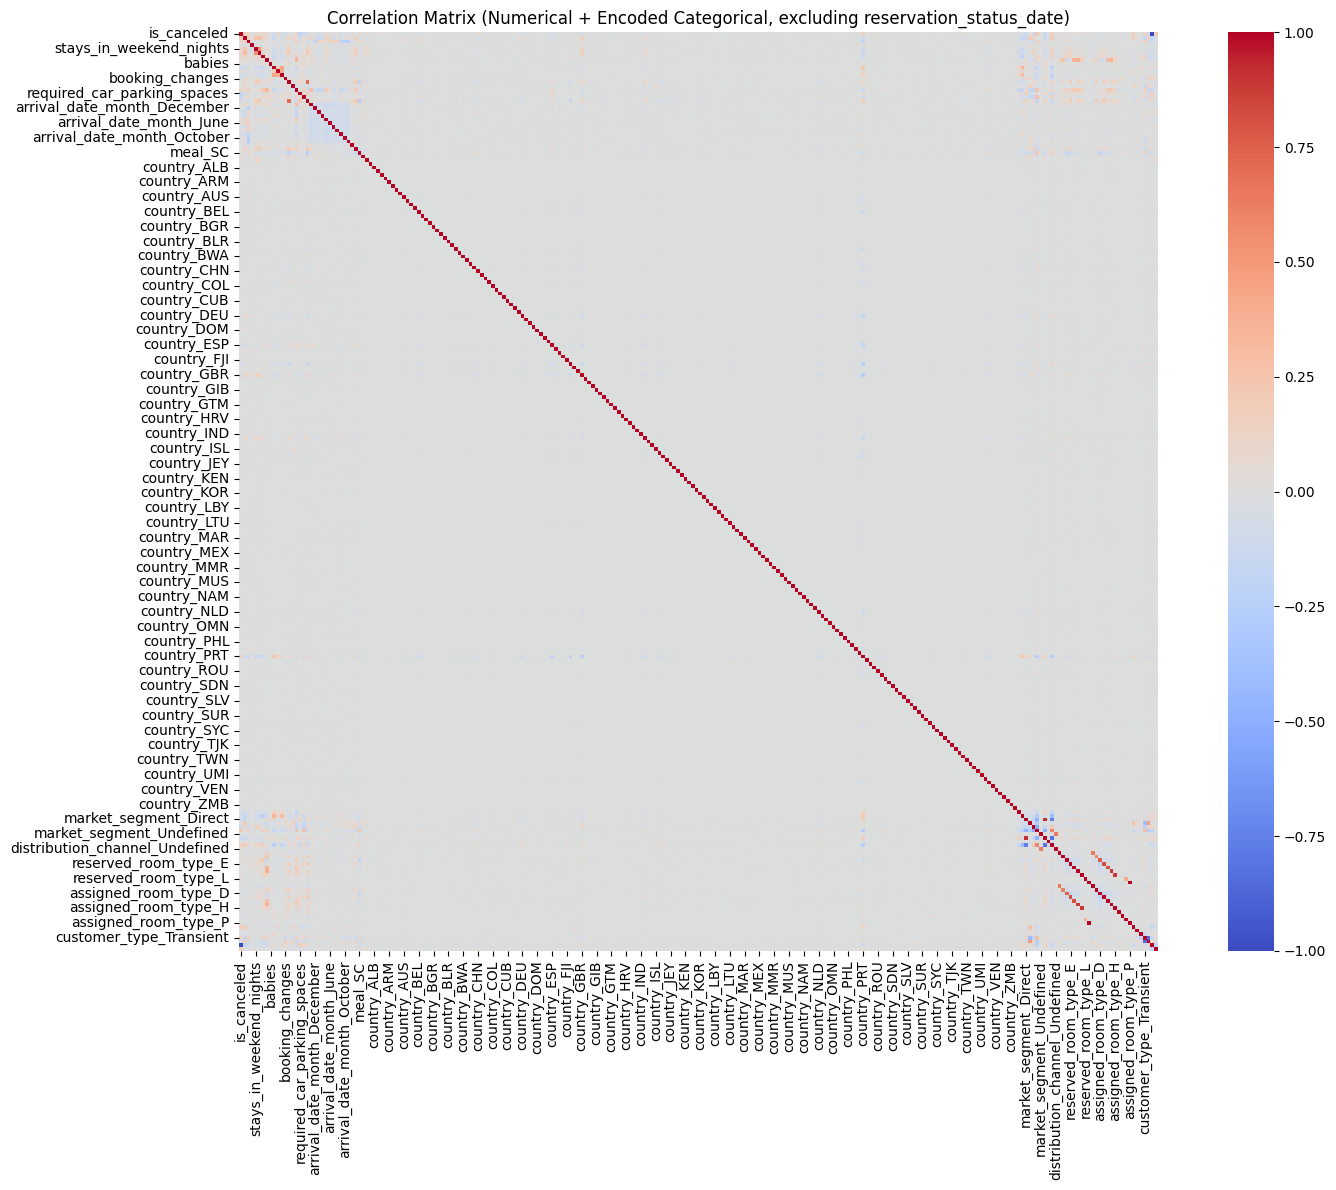

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Separate numeric and object columns
numeric_data = hotel_data.select_dtypes(include=['int32', 'int64', 'float32', 'float64'])
object_data = hotel_data.select_dtypes(include='object').drop(columns=['reservation_status_date'])

# One-hot encode object columns
object_encoded = pd.get_dummies(object_data, drop_first=True)

# Combine numeric and encoded object data
combined_data = pd.concat([numeric_data, object_encoded], axis=1)

# Fill missing values if any
combined_data = combined_data.fillna(0)

# Compute correlation matrix
corr_matrix = combined_data.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title("Correlation Matrix (Numerical + Encoded Categorical, excluding reservation_status_date)")
plt.tight_layout()
plt.show()

In [ ]:
# Select upper triangle of correlation matrix (excluding diagonal)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find feature pairs with high correlation (|r| > 0.5)
high_corr_pairs = [
    (col, row, upper.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if abs(upper.loc[row, col]) > 0.7
]

# Create DataFrame of high correlation pairs
high_corr_df = pd.DataFrame(
    sorted(high_corr_pairs, key=lambda x: abs(x[2])),
    columns=["Feature 1", "Feature 2", "Correlation"]
)

# Display results
print(high_corr_df)

                        Feature 1                    Feature 2  Correlation
0              hotel_Resort Hotel                        agent     0.705228
1      distribution_channel_TA/TO        market_segment_Direct    -0.750418
2            assigned_room_type_D         reserved_room_type_D     0.755841
3      distribution_channel_TA/TO  distribution_channel_Direct    -0.813291
4            assigned_room_type_E         reserved_room_type_E     0.814262
5            assigned_room_type_F         reserved_room_type_F     0.817410
6   customer_type_Transient-Party      customer_type_Transient    -0.850784
7            assigned_room_type_G         reserved_room_type_G     0.879935
8            assigned_room_type_H         reserved_room_type_H     0.891813
9     distribution_channel_Direct        market_segment_Direct     0.916329
10           assigned_room_type_P         reserved_room_type_P     1.000000
11   reservation_status_Check-Out                  is_canceled    -1.000000


# Test of XGBooast

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

# Copy data to avoid modifying original
df = hotel_data.copy()

# Define label
y = df['is_canceled']

# Drop label and non-informative columns (optional)
X = df.drop(columns=[
    'is_canceled',
    'reservation_status',
    'reservation_status_date',
    'deposit_type'  # optional
])

# Separate columns by type
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# Full pipeline with XGBoost
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1
    ))
])

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Predict using cross-validation
y_pred = cross_val_predict(model_pipeline, X, y, cv=cv)

# Evaluate
print("📋 Classification Report:")
print(classification_report(y, y_pred))

print(f"✅ Accuracy: {accuracy_score(y, y_pred):.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:13:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:13:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:13:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:13:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:13:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     63346
           1       0.76      0.65      0.70     24024

    accuracy                           0.85     87370
   macro avg       0.81      0.79      0.80     87370
weighted avg       0.84      0.85      0.84     87370

✅ Accuracy: 0.8459


# Data Visualization

**1. What type of hotel has more bookings?**

([<matplotlib.patches.Wedge at 0x7f01f6b52f50>,
 [Text(-1.0332115701722522, -0.3774570853251924, 'City Hotel'),
  Text(1.0332115371739006, 0.37745717565141873, 'Resort Hotel')],
 [Text(-0.5635699473666829, -0.20588568290465037, '61.1%'),
  Text(0.563569929367582, 0.2058857321735011, '38.9%')])

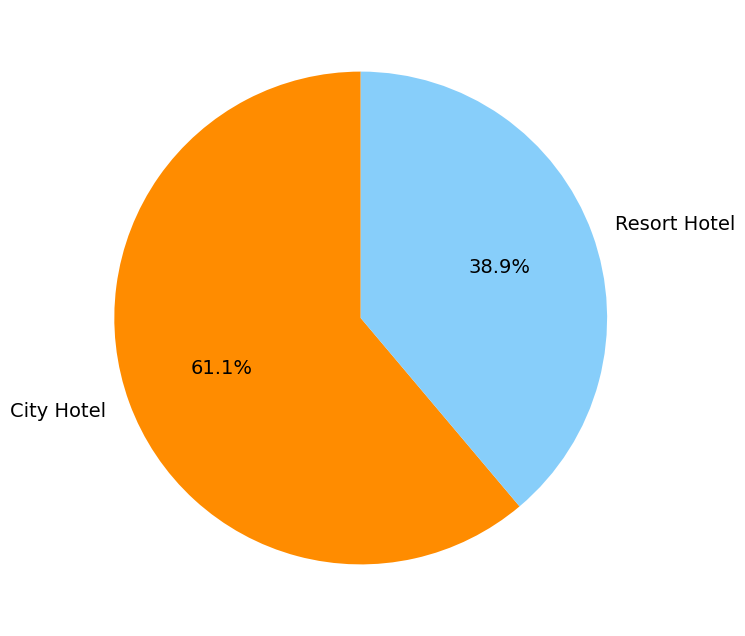

In [ ]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# assigning labels and converting them to list
labels = hotel_data['hotel'].value_counts().index.tolist()

# assigning magnitude and converting to list
sizes = hotel_data['hotel'].value_counts().tolist()

# assigning pie chart color
colors = ["darkorange","lightskyblue"]

# creating pie chart
# autopct enables you to display the percent value using Python string formatting. .1f% will round off to the tenth place.
# startangle will allow the percentage to rotate counter-clockwise. Lets say we have 4 portions: 10%, 30%, 20% and 40%. The pie will rotate from smallest to the biggest (counter clockwise). 10% -> 20% -> 30% -> 40%
# We have only 2 sections so anglestart does not matter
# textprops will adjust the size of text
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

**2. Which are the most busy months?¶**

Text(0, 0.5, 'Count')

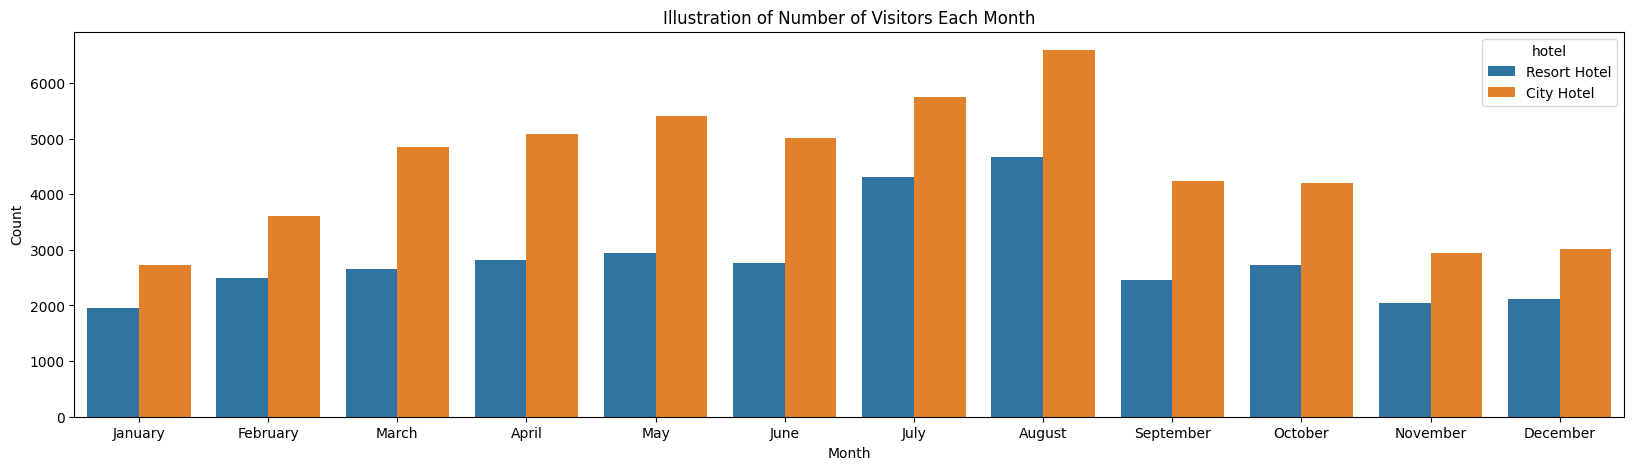

In [ ]:
# We can simply use a countplot as we sre visualising categorical data
plt.figure(figsize=(20,5))

# data we will use in a list
l1 = ['hotel','arrival_date_month']

# plotting
sns.countplot(data = hotel_data[l1],x= "arrival_date_month",hue="hotel",order=["January","February","March","April","May","June",
                                                                              "July","August","September","October","November","December"]).set_title(
'Illustration of Number of Visitors Each Month')
plt.xlabel('Month')
plt.ylabel('Count')

**3. Cancellation rates in the two types of hotels.**

Text(0.5, 0, 'Bookings Cancelled')

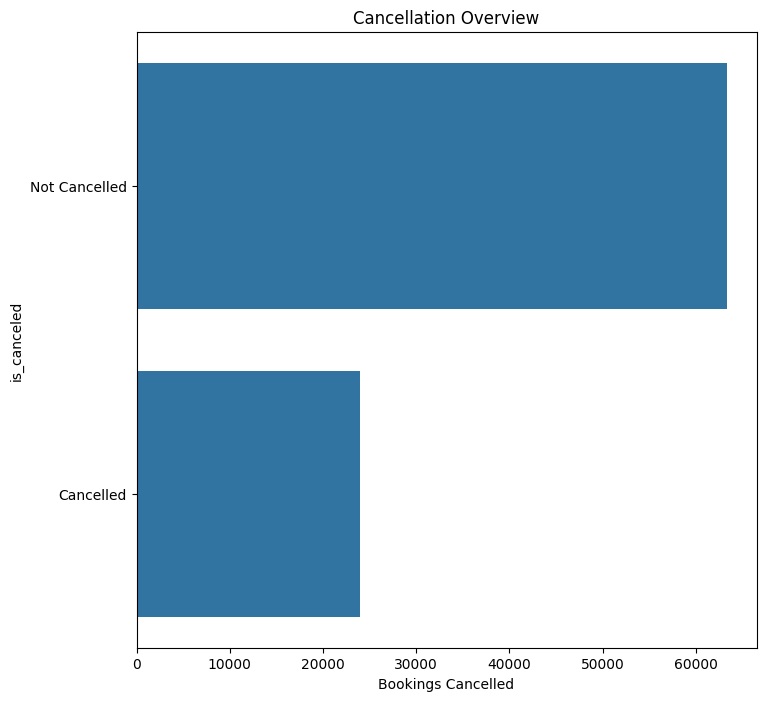

In [ ]:
# First we will check proportion of bookings that were cancelled

# Replacing the 1s and 0s in the is_cancelled column to cancelled and not cancelled.
hotel_data['is_canceled'] = hotel_data.is_canceled.replace([1,0],["Cancelled","Not Cancelled"])
cancelled_data = hotel_data['is_canceled']

# Plotting a countplot
sns.countplot(cancelled_data).set_title("Cancellation Overview")
plt.xlabel("Bookings Cancelled")

We can see that more than 60% of the bookings were not cancelled.

In [ ]:
# Let's look into how much of bookings were cancelled in each type of hotel
lst1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = hotel_data[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'Cancelled'].groupby(['hotel']).size().reset_index(name = 'count')
canceled_hotel
#sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').set_title('Graph showing cancellation rates in city and resort hotel')

,hotel,count
0,City Hotel,16049
1,Resort Hotel,7975
